In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data_df, city_data_df, how="left", on="city")

# Display the data table for preview
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

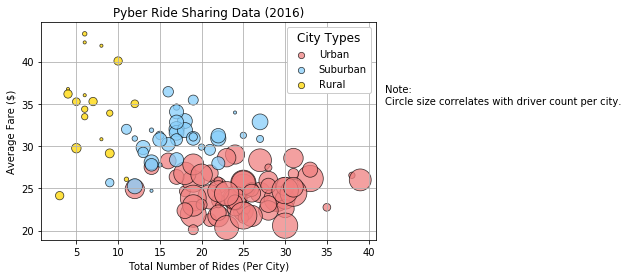

In [6]:
# BUBBLE PLOT OF RIDE SHARE DATA

# Set the city types and their colors into arrays
ctypes = ["Urban", "Suburban", "Rural"]
ccolors = ["lightcoral", "lightskyblue", "gold"]

# Loop through each of the three city types
for i in range(len(ctypes)):
    
    # Create a dataframe that is filtered and indexed by city type
    # in each iteration then grouped by city name 
    city_grp_df = combined_df.set_index("type").loc[ctypes[i],:].groupby(["city"])

    # Calculate the total number of rides per city (x-axis)
    tot_ride = city_grp_df["city"].value_counts()

    # Calculate the average fare per city (y-axis)
    avg_fare = city_grp_df["fare"].mean()

    # Calculate the total number of drivers per city (bubble size)
    drv_city =  city_grp_df["driver_count"].mean()
    
    # Plot each scatter by city
    plt.scatter(tot_ride, avg_fare, s=(drv_city*10), 
                facecolor=ccolors[i], edgecolor="black",
                alpha = 0.75, linewidth = 0.75)
    
# Format the chart output
pyber_legend = plt.legend(ctypes, loc="best", framealpha=1)
pyber_legend.set_title("City Types",prop={"size":"large"})

# Create standard size bubbles in the legend
for j in range(len(ctypes)):
    pyber_legend.legendHandles[j]._sizes = [40]
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")
plt.savefig("../Images/pyber_bubbleplot.png")
plt.show()

## Total Fares by City Type

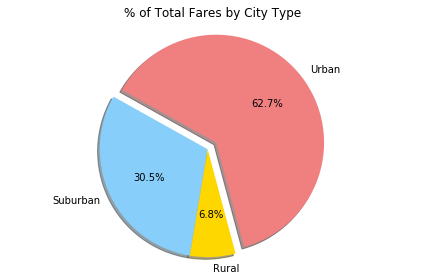

In [7]:
# TOTAL FARES BY CITY TYPE

cfares = [0,0,0]
explode = (0.1, 0, 0)

# Sum fares for each of the city types
for i in range(len(ctypes)):
    type_fares_df = combined_df.set_index("type").loc[ctypes[i],:]
    cfares[i] = type_fares_df["fare"].sum()

# Display and export (png) the pie 
plt.pie(cfares, explode=explode, labels=ctypes, colors=ccolors,
        autopct="%1.1f%%", shadow=True, startangle=285)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.tight_layout()
plt.savefig("../Images/pyber_tfares_pie.png")
plt.show()


## Total Rides by City Type

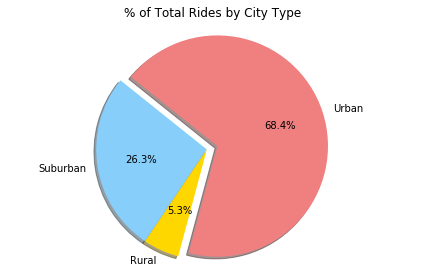

In [8]:
# TOTAL RIDES BY CITY TYPE

crides = [0,0,0]
explode = (0.1, 0, 0)

# Sum rides for each of the city types
for i in range(len(ctypes)):
    type_rides_df = combined_df.set_index("type").loc[ctypes[i],:]
    crides[i] = type_rides_df["fare"].count()

# Display and export (png) the pie    
plt.pie(crides, explode=explode, labels=ctypes, colors=ccolors,
        autopct="%1.1f%%", shadow=True, startangle=255)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.tight_layout()
plt.savefig("../Images/pyber_trides_pie.png")
plt.show()


## Total Drivers by City Type

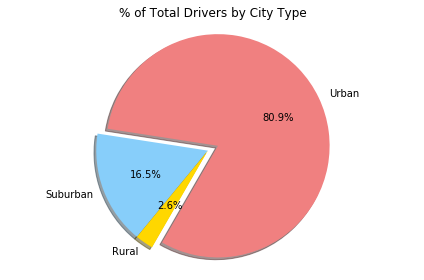

In [9]:
# TOTAL DRIVERS BY CITY TYPE

cdrvrs = [0,0,0]
explode = (0.1, 0, 0)

# Sum drivers for each of the city types
for i in range(len(ctypes)):
    type_drvrs_df = city_data_df.set_index("type").loc[ctypes[i],:]
    cdrvrs[i] = type_drvrs_df["driver_count"].sum()

# Display and export (png) the pie      
plt.pie(cdrvrs, explode=explode, labels=ctypes, colors=ccolors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.tight_layout()
plt.savefig("../Images/pyber_tdrvrs_pie.png")
plt.show()
